In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

In [ ]:
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
# We dont have any missing value !
missing_values = data.isnull().mean()*100
missing_values.sum()

0.0

In [ ]:
stats = data.describe()
stats=stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [ ]:
# We transform our categorical feature to numerical one 

In [ ]:
data['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [ ]:
data['marital'].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [ ]:
data['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [ ]:
data['default'].value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [ ]:
data['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [ ]:
data['contact'].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [ ]:
data['loan'].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [ ]:
data['housing'].value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

In [ ]:
data['pdays'].value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 587       1
 579       1
 515       1
 491       1
 683       1
Name: pdays, Length: 472, dtype: int64

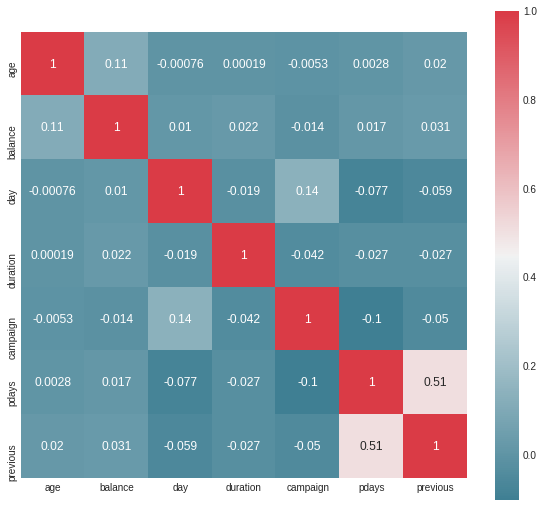

In [ ]:
#Vizualisation
#Correlation map
def plot_correlation_map( data ):
    corr = data.corr()
    s , ax = plt.subplots( figsize =( 10 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap( corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 } )
plot_correlation_map(data)

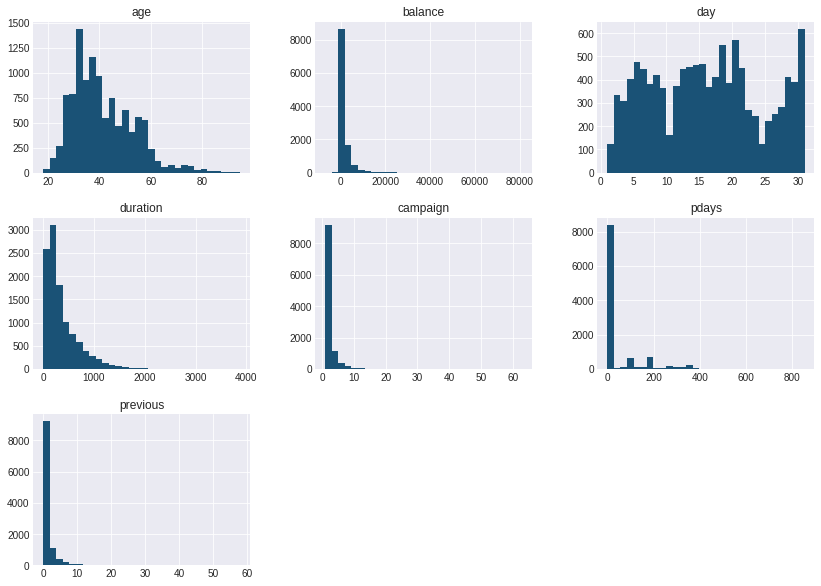

In [ ]:
plt.style.use('seaborn-darkgrid')

data.hist(bins=30, figsize=(14,10), color='#1A5276')
plt.show()

In [ ]:
#The categorical features with piechart

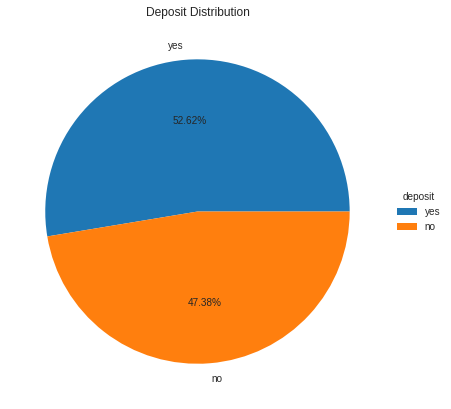

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))

depo = ['yes', 'no']
depo_num = [5873,5289]
                                 
ax.pie(depo_num, labels = depo,autopct='%1.2f%%')
ax.legend(depo,
          title="deposit",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Deposit Distribution")

plt.show()

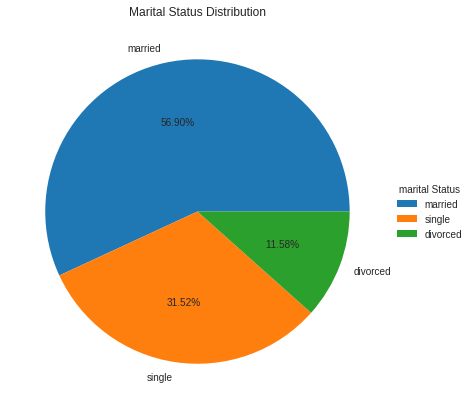

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))

marit = ['married', 'single','divorced']
marit_num = [6351,3518,1293]
                                 
ax.pie(marit_num, labels = marit,autopct='%1.2f%%')
ax.legend(marit,
          title="marital Status",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Marital Status Distribution")

plt.show()

In [ ]:
#The categorical features with boxplot

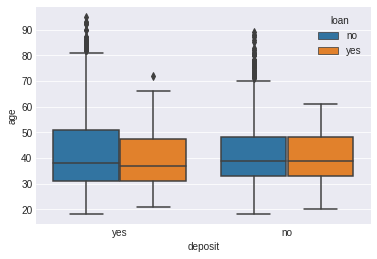

In [ ]:
sns.boxplot(x="deposit", y="age", hue="loan", data=data)

plt.show()

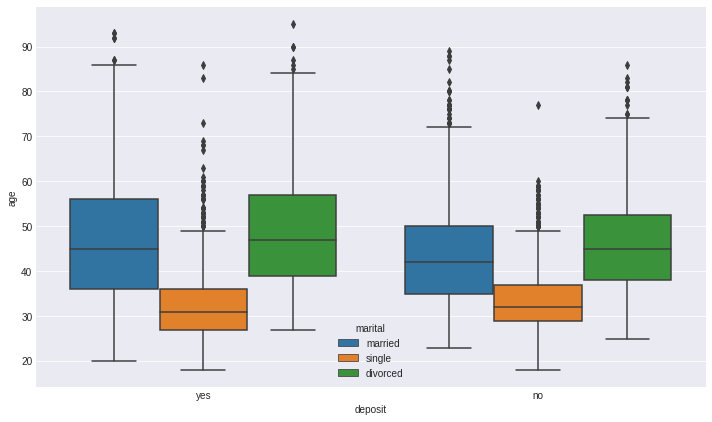

In [ ]:
fig=plt.figure(figsize=(12,7))   

sns.boxplot(x="deposit", y="age", hue="marital", data=data)

plt.show()

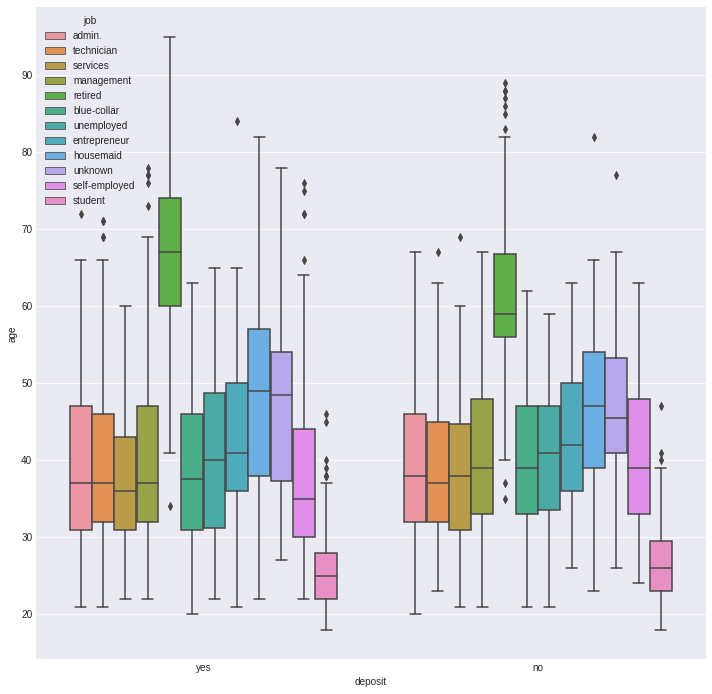

In [ ]:
fig=plt.figure(figsize=(12,12))   

sns.boxplot(x="deposit", y="age", hue="job", data=data)

plt.show()

In [ ]:
#Preprocessing
#splitting the date into catg/num 


cols = data.columns
num_cols= data._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [ ]:
data[num_cols].head()

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [ ]:
data[cat_cols].head()

,deposit,contact,education,poutcome,loan,job,default,month,marital,housing
0,yes,unknown,secondary,unknown,no,admin.,no,may,married,yes
1,yes,unknown,secondary,unknown,no,admin.,no,may,married,no
2,yes,unknown,secondary,unknown,no,technician,no,may,married,yes
3,yes,unknown,secondary,unknown,no,services,no,may,married,yes
4,yes,unknown,tertiary,unknown,no,admin.,no,may,married,no


In [ ]:
# we encode the categorical data 

data_Encod = data[cat_cols].apply(LabelEncoder().fit_transform)

In [ ]:
data_Encod.head()

,deposit,contact,education,poutcome,loan,job,default,month,marital,housing
0,1,2,1,3,0,0,0,8,1,1
1,1,2,1,3,0,0,0,8,1,0
2,1,2,1,3,0,9,0,8,1,1
3,1,2,1,3,0,7,0,8,1,1
4,1,2,2,3,0,0,0,8,1,0


In [ ]:
new_data = data_Encod.join(data[num_cols])
new_data.head()

,deposit,contact,education,poutcome,loan,job,default,month,marital,housing,age,balance,day,duration,campaign,pdays,previous
0,1,2,1,3,0,0,0,8,1,1,59,2343,5,1042,1,-1,0
1,1,2,1,3,0,0,0,8,1,0,56,45,5,1467,1,-1,0
2,1,2,1,3,0,9,0,8,1,1,41,1270,5,1389,1,-1,0
3,1,2,1,3,0,7,0,8,1,1,55,2476,5,579,1,-1,0
4,1,2,2,3,0,0,0,8,1,0,54,184,5,673,2,-1,0


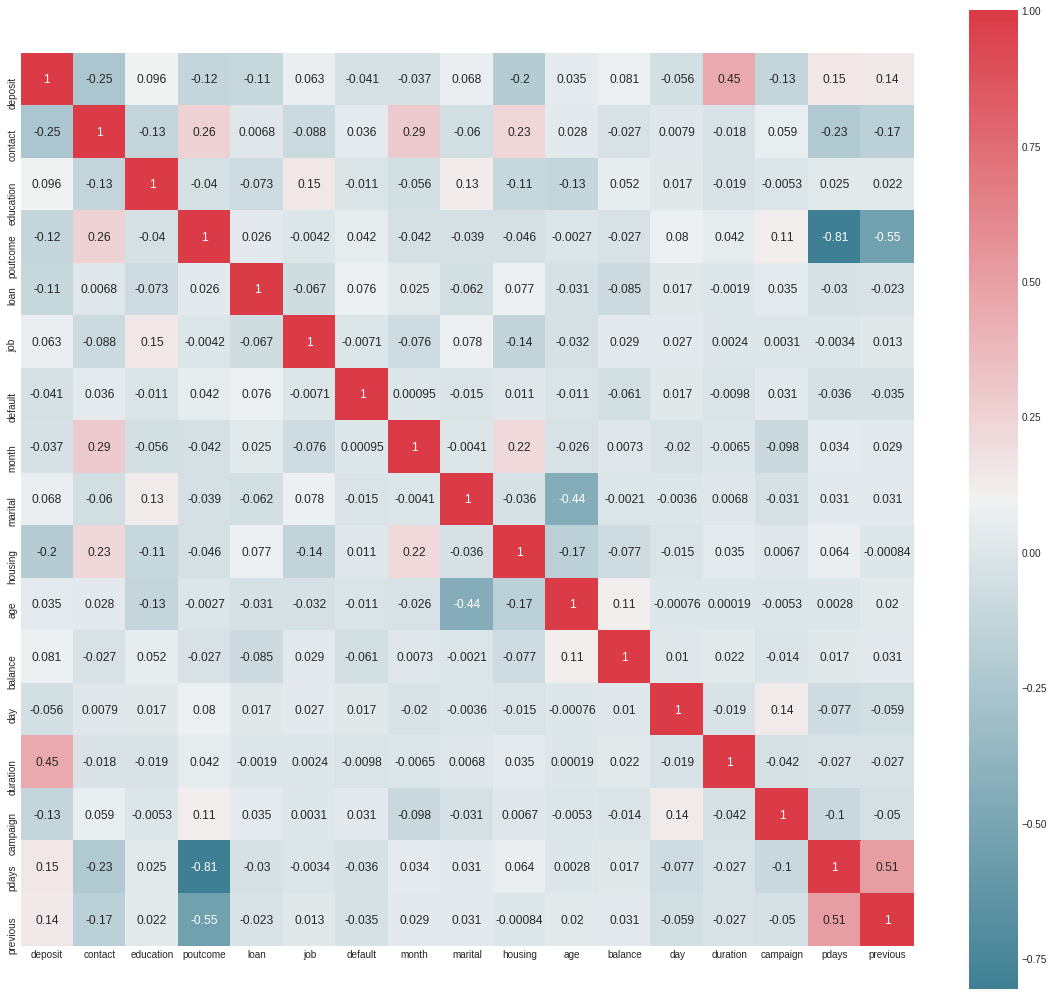

In [ ]:
# now we can see the correlation between all the features :
def plot_correlation_map( data ):
    corr = data.corr()
    s , ax = plt.subplots( figsize =( 20 , 20 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap( corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 } )
plot_correlation_map(new_data)

In [ ]:
data_cor = new_data.corr()['deposit'][:-1]
feature_list = data_cor[abs(data_cor)>0.1].sort_values(ascending=False)
feature_list

deposit     1.000000
duration    0.451919
pdays       0.151593
loan       -0.110580
poutcome   -0.122369
campaign   -0.128081
housing    -0.203888
contact    -0.249847
Name: deposit, dtype: float64

In [ ]:
new_data.columns

Index(['deposit', 'contact', 'education', 'poutcome', 'loan', 'job', 'default',
       'month', 'marital', 'housing', 'age', 'balance', 'day', 'duration',
       'campaign', 'pdays', 'previous'],
      dtype='object')

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler()
X_train = X_std.fit_transform(X_train)
X_valid = X_std.fit_transform(X_valid)

In [ ]:
# Construction of the  model

model = keras.Sequential([layers.Dense(32, input_dim=16, 
                      kernel_initializer="uniform", activation="relu"),
                      layers.Dense(16, 
                      kernel_initializer="uniform", activation="relu"),
                      layers.Dropout(0.2),
                      layers.Dense(16, 
                      kernel_initializer="uniform", activation="relu"),
                      layers.Dropout(0.5),
                      layers.Dense(1, activation="sigmoid")])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
____________________________________________________

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="Nadam", metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=25)

Epoch 1/25
280/280 [==============================] - 2s 3ms/step - loss: 0.5453 - accuracy: 0.7338 - val_loss: 0.4439 - val_accuracy: 0.8056
Epoch 2/25
280/280 [==============================] - 1s 2ms/step - loss: 0.4628 - accuracy: 0.8041 - val_loss: 0.4404 - val_accuracy: 0.8047
Epoch 3/25
280/280 [==============================] - 1s 2ms/step - loss: 0.4513 - accuracy: 0.8070 - val_loss: 0.4312 - val_accuracy: 0.8061
Epoch 4/25
280/280 [==============================] - 1s 2ms/step - loss: 0.4505 - accuracy: 0.8111 - val_loss: 0.4259 - val_accuracy: 0.8133
Epoch 5/25
280/280 [==============================] - 1s 2ms/step - loss: 0.4470 - accuracy: 0.8130 - val_loss: 0.4231 - val_accuracy: 0.8195
Epoch 6/25
280/280 [==============================] - 1s 2ms/step - loss: 0.4403 - accuracy: 0.8160 - val_loss: 0.4222 - val_accuracy: 0.8159
Epoch 7/25
280/280 [==============================] - 1s 2ms/step - loss: 0.4362 - accuracy: 0.8146 - val_loss: 0.4233 - val_accuracy: 0.8150
Epoch 

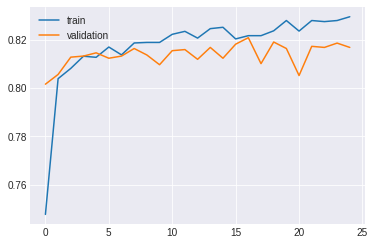

In [ ]:
#Visualization of the results (accuracy/loss) :
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

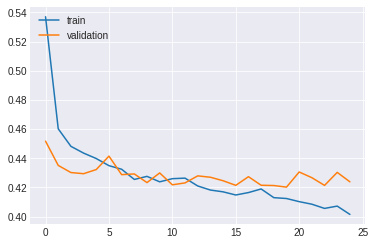

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_valid,  y_valid, verbose=2)
print('\nTest accuracy:', test_acc *100, '%')

70/70 - 0s - loss: 0.4238 - accuracy: 0.8168

Test accuracy: 81.68383240699768 %


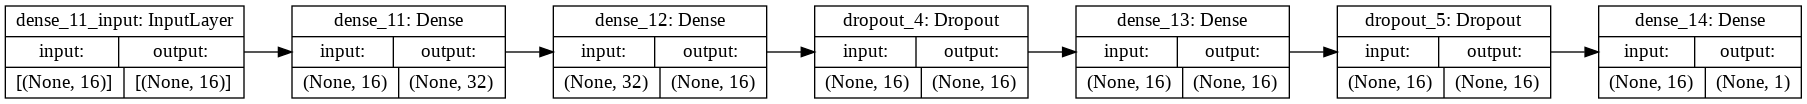

In [ ]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")